In [1]:
import sys
import os
import numpy as np
import pandas as pd

# Add the src directory to the Python path
sys.path.append(os.path.abspath(os.path.join('..', 'src')))
from utils import download_data
from mappings import value_mapping
# Now you can import the TimeSeriesDataset class
from TimeSeriesDataset import TimeSeriesDataset as TSD

In [2]:
# initialize dataset by downloading dataset or downloading the data from polity_url
dataset = TSD(categories=['sc'], template_path='../datasets/test.csv')
dataset.add_polities()

Loaded template from ../datasets/test.csv
Downloaded 839 rows


In [3]:
url = "https://seshatdata.com/api/crisisdb/power-transitions/"
pt_df = download_data(url)

Downloaded 3449 rows


In [4]:
PT_types = ['overturn', 'predecessor_assassination', 'intra_elite',
       'military_revolt', 'popular_uprising', 'separatist_rebellion',
       'external_invasion', 'external_interference']
for type in PT_types:
    pt_df[type] = pt_df[type].apply(lambda x: value_mapping[x] if x in value_mapping.keys() else np.nan)

# set nan values to 0
# pt_df.fillna(0, inplace=True)
pt_df['Crisis'] = pt_df[PT_types].sum(axis=1)

In [5]:
dataset.raw['Crisis'] = np.nan
dataset.raw

,NGA,PolityID,PolityName,Year,Crisis
0,Southern Mesopotamia,132,iq_abbasid_cal_1,NaN,NaN
1,Southern Mesopotamia,484,iq_abbasid_cal_2,NaN,NaN
2,Susiana,107,ir_achaemenid_emp,NaN,NaN
3,NaN,637,so_adal_sultanate,NaN,NaN
4,NaN,872,tn_aghlabid_dyn,NaN,NaN
...,...,...,...,...,...
834,NaN,227,et_zagwe,NaN,NaN
835,NaN,231,dz_zayyanid_dyn,NaN,NaN
836,NaN,222,tn_zirid_dyn,NaN,NaN
837,Orkhon Valley,444,mn_zungharian_emp,NaN,NaN


In [6]:
# for idx, row in pt_df.iterrows():
#     polity = row['polity_id']
#     if polity not in dataset.raw.PolityID.unique():
#         continue
#     year_from = row['year_from']
#     year_to = row['year_to']
#     if year_from != 0 and year_to != 0:
#         year = np.mean([year_from,year_to])
#     elif year_from == 0 and year_to != 0:
#         year = year_to
#     elif year_from != 0 and year_to != 0:
#         year = year_from
#     elif year_from == 0 and year_to == 0:
#         continue
#     dataset.add_years(polID=polity, year=year)
#     dataset.raw.loc[dataset.raw.Year == year,'Crisis'] = row.Crisis
    

for idx, row in pt_df.iterrows():
    polity = row['polity_id']
    if polity not in dataset.raw.PolityID.unique():
        continue
    year_from = row['year_from']
    year_to = row['year_to']
    if pd.notna(year_from) and pd.notna(year_to):
        year = np.mean([year_from,year_to])
    elif pd.notna(year_from) and pd.isna(year_to):
        year = year_to
    elif pd.isna(year_from) and pd.notna(year_to):
        year = year_from
    elif pd.isna(year_from) and pd.isna(year_to):
        year = np.nan
    dataset.add_years(polID=polity, year=year)
    dataset.raw.loc[dataset.raw.Year == year,'Crisis'] = row.Crisis

In [7]:
dataset.raw

,NGA,PolityID,PolityName,Year,Crisis
0,NaN,321,es_castile_k,NaN,NaN
1,NaN,770,us_chaco_bonito_2,NaN,NaN
2,NaN,769,us_chaco_bonito_1,NaN,NaN
3,NaN,576,us_chaco_bonito_3,NaN,NaN
4,NaN,583,us_chaco_mcelmo,NaN,NaN
...,...,...,...,...,...
3790,NaN,592,us_united_states_of_america_contemporary,2011.0,0.0
3791,NaN,582,mx_mexico_2,2015.0,1.0
3792,NaN,592,us_united_states_of_america_contemporary,2015.0,1.0
3793,NaN,605,tr_turkey_rep,2016.0,0.0


In [8]:
dataset.raw = dataset.raw.loc[(dataset.raw.Year.notna())&(dataset.raw.Year!=0)]

# delete duplicates
dataset.raw.drop_duplicates(subset=['PolityID', 'Year'], inplace=True)

dataset.raw = dataset.raw.sort_values(by=['PolityID', 'Year'])
dataset.raw.reset_index(drop=True, inplace=True)

/var/folders/c3/82t48qlj2bg0xttc4k7vx70r0000gq/T/ipykernel_10788/4228763813.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.raw.drop_duplicates(subset=['PolityID', 'Year'], inplace=True)


In [9]:
dataset.download_all_categories()

Error: The year is outside the polity's start and end year
Error: The year is outside the polity's start and end year
Error: The year is outside the polity's start and end year
Error: The year is outside the polity's start and end year
Error: The year is outside the polity's start and end year
Error: The year is outside the polity's start and end year
Error: The year is outside the polity's start and end year
Error: The year is outside the polity's start and end year
Error: The year is outside the polity's start and end year
Error: The year is outside the polity's start and end year
Error: The year is outside the polity's start and end year
Error: The year is outside the polity's start and end year
Error: The year is outside the polity's start and end year
Error: The year is outside the polity's start and end year
Error: The year is outside the polity's start and end year
Error: The year is outside the polity's start and end year
Error: The year is outside the polity's start and end ye

In [10]:
# remove all rows that have less than 30% of the columns filled in
dataset.remove_incomplete_rows(nan_threshold=0.3)
# build the social complexity variables
dataset.build_social_complexity()

dataset.scv['Crisis'] = dataset.raw.Crisis

In [11]:
dataset.impute_missing_values()

In [12]:
dataset.scv_imputed['Crisis'] = dataset.scv['Crisis']

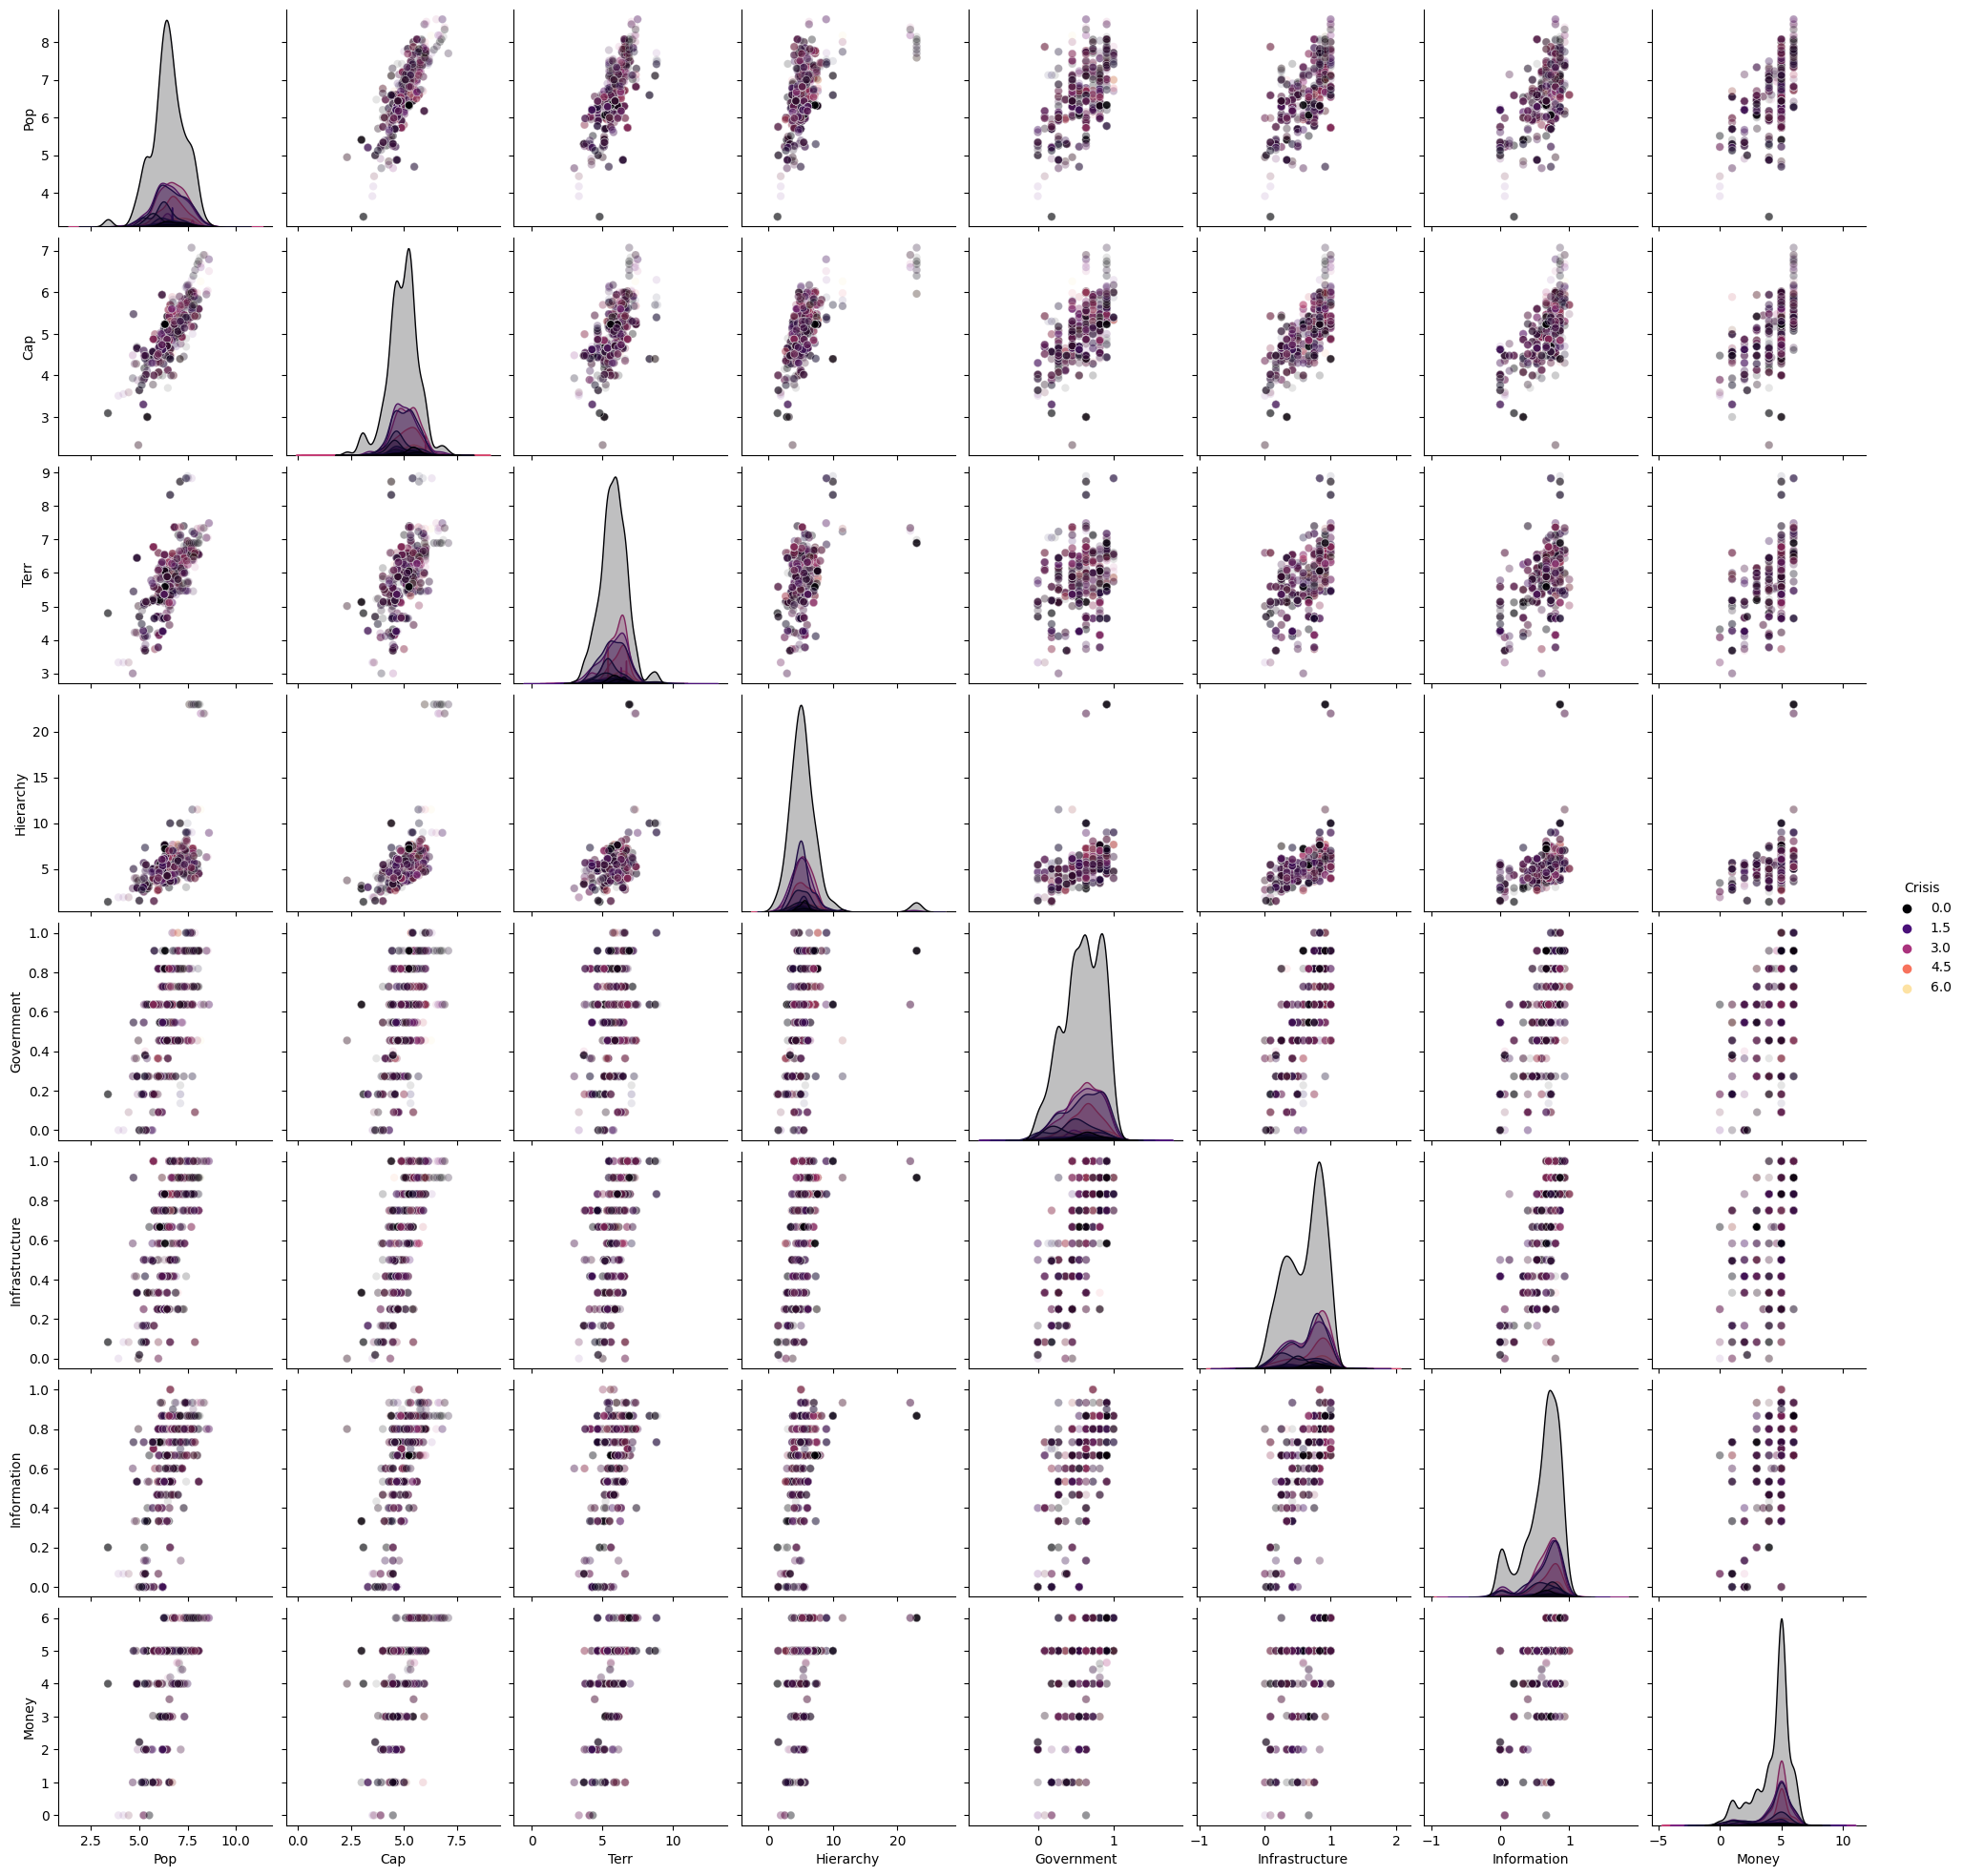

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
sc_columns = ['Pop','Cap','Terr','Hierarchy', 'Government', 'Infrastructure', 'Information', 'Money', 'Crisis']

sns.pairplot(dataset.scv_imputed[sc_columns], hue='Crisis', palette = 'magma' , plot_kws={'alpha': 0.1})
plt.show()

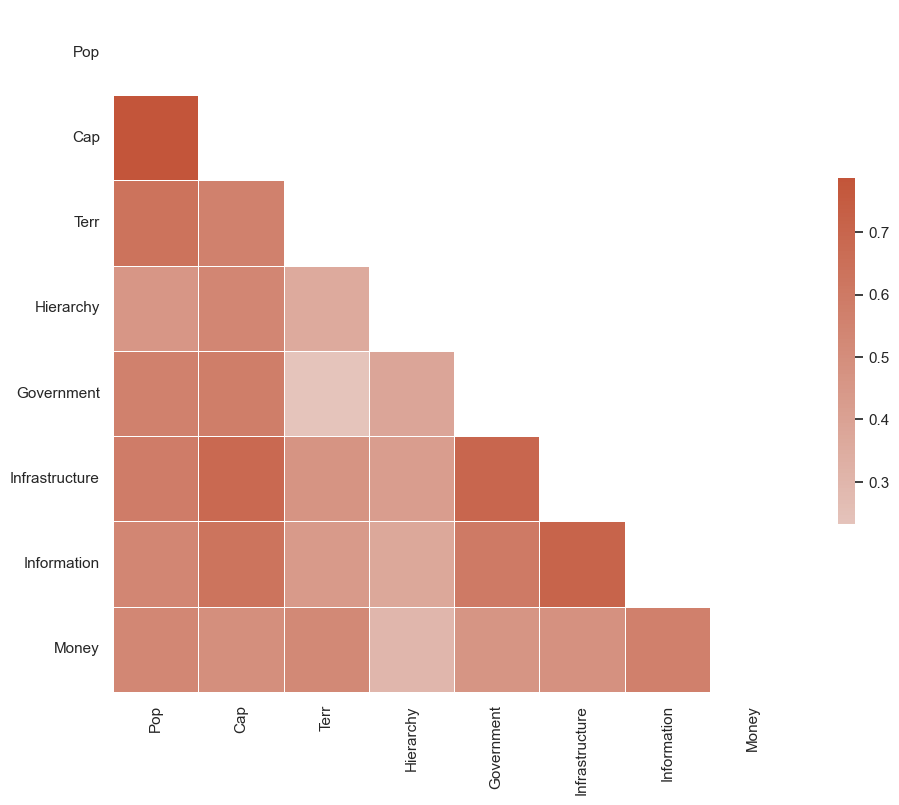

In [14]:
sc_columns = ['Pop','Cap','Terr','Hierarchy', 'Government', 'Infrastructure', 'Information', 'Money']


sns.set_theme(style="white")

# Generate a large random dataset
rs = np.random.RandomState(33)
d = dataset.scv_imputed[sc_columns]

# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

In [ ]:
dataset.compute_PCA(sc_columns, 'PC', n_cols = 2, n_PCA = 8)
dataset.scv_imputed

Explained variance by each PC:
PC1: 58.86%
PC2: 10.92%
PC3: 9.54%
PC4: 6.47%
PC5: 5.42%
PC6: 3.93%
PC7: 2.84%
PC8: 2.01%


,NGA,PolityID,PolityName,Year,Pop,Terr,Cap,Hierarchy,Government,Infrastructure,Information,Money,Crisis,PCA_1,PCA_2
0,Middle Yellow River Valley,1,cn_qing_dyn_1,1652.5,8.066122,7.117271,5.824925,6.75000,0.727273,0.916667,0.8,6.0,0.0,-3.120575,0.891890
1,Middle Yellow River Valley,1,cn_qing_dyn_1,1691.5,8.066122,7.117271,5.824925,6.75000,0.727273,0.916667,0.8,6.0,0.0,-3.120575,0.891890
2,Middle Yellow River Valley,1,cn_qing_dyn_1,1728.5,8.066122,7.117271,5.824925,6.75000,0.727273,0.916667,0.8,6.0,0.0,-3.120575,0.891890
3,Middle Yellow River Valley,1,cn_qing_dyn_1,1765.5,8.066122,7.117271,5.824925,6.75000,0.727273,0.916667,0.8,6.0,0.2,-3.120575,0.891890
4,Middle Yellow River Valley,2,cn_qing_dyn_2,1808.0,8.469822,7.053078,5.949825,6.29981,0.909091,1.000000,0.8,6.0,0.0,-3.687457,0.452466
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2053,NaN,797,de_empire_1,1013.0,7.332438,6.000000,5.143265,5.50000,0.727273,0.583333,0.8,3.0,2.0,-0.636203,-0.236214
2054,NaN,797,de_empire_1,1031.5,7.332438,6.000000,5.143265,5.50000,0.727273,0.583333,0.8,3.0,0.0,-0.636203,-0.236214
2055,NaN,797,de_empire_1,1047.5,7.332438,6.000000,5.143265,5.50000,0.727273,0.583333,0.8,3.0,2.0,-0.636203,-0.236214
2056,NaN,797,de_empire_1,1081.0,7.332438,6.000000,5.143265,5.50000,0.727273,0.583333,0.8,3.0,3.0,-0.636203,-0.236214


In [16]:
dataset.save_dataset(path='../datasets/', name='power_transitions')

Dataset saved to ../datasets/power_transitions.xlsx
